In [10]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
from matplotlib.dates import DateFormatter
import seaborn as sns
import statsmodels.api as sm

%matplotlib notebook

In [11]:
casecounts = pd.read_csv("data/covid-sandiego-over-time.csv")

casecounts['Date'] = pd.DatetimeIndex(casecounts['Date']).date
casecounts = casecounts.set_index(['Date'])
casecounts = casecounts['Total']
casecounts

Date
2020-03-06      2
2020-03-07      2
2020-03-08      2
2020-03-09      2
2020-03-10      2
2020-03-11      2
2020-03-12      2
2020-03-13      2
2020-03-14      8
2020-03-15     39
2020-03-16     55
2020-03-17     60
2020-03-18     80
2020-03-19    105
2020-03-20    131
2020-03-21    159
2020-03-22    205
2020-03-23    230
2020-03-24    242
2020-03-25    297
2020-03-26    341
2020-03-27    417
2020-03-28    519
2020-03-29    603
2020-03-30    734
2020-03-31    849
2020-04-01    966
Name: Total, dtype: int64

In [12]:
emergencyresponse = pd.read_csv("data/fd_incidents_2020_datasd_v1.csv")

emergencyresponse['Date'] = pd.DatetimeIndex(emergencyresponse['date_response']).date

emergencyresponse.sort_values(['date_response']).head()

,agency_type,call_category,address_city,incident_number,jurisdiction,problem,date_response,address_state,address_zip,day_response,month_response,year_response,Date
39853,Fire,EVENTS,SAN DIEGO,FS20000001,San Diego,EVENTS,2020-01-01 00:01:36,CA,92101.0,1,1,2020,2020-01-01
39852,Fire,Emergency Medical Response,SAN DIEGO,FS20000003,San Diego,Emergency Medical Response,2020-01-01 00:03:12,CA,92106.0,1,1,2020,2020-01-01
39851,Fire,FIRE,SAN DIEGO,FS20000002,San Diego,FIRE,2020-01-01 00:03:33,CA,92107.0,1,1,2020,2020-01-01
39850,Fire,Emergency Medical Response,SAN DIEGO,FS20000007,San Diego,Emergency Medical Response,2020-01-01 00:09:11,CA,92103.0,1,1,2020,2020-01-01
39849,Fire,Emergency Medical Response,SAN DIEGO,FS20000006,San Diego,Emergency Medical Response,2020-01-01 00:09:56,CA,92103.0,1,1,2020,2020-01-01


In [13]:
count_incidents = emergencyresponse.groupby(['Date'])['incident_number'].count().reset_index(name='count_incidents')
count_incidents = count_incidents.set_index(['Date']).join(casecounts).reset_index()
count_incidents = count_incidents.loc[:91]
#count_incidents = count_trafcollisions.set_index(['Date'])
count_incidents.head()

,Date,count_incidents,Total
0,2020-01-01,500,NaN
1,2020-01-02,475,NaN
2,2020-01-03,496,NaN
3,2020-01-04,435,NaN
4,2020-01-05,436,NaN


In [14]:
plt.style.use('seaborn-colorblind')

<IPython.core.display.Javascript object>


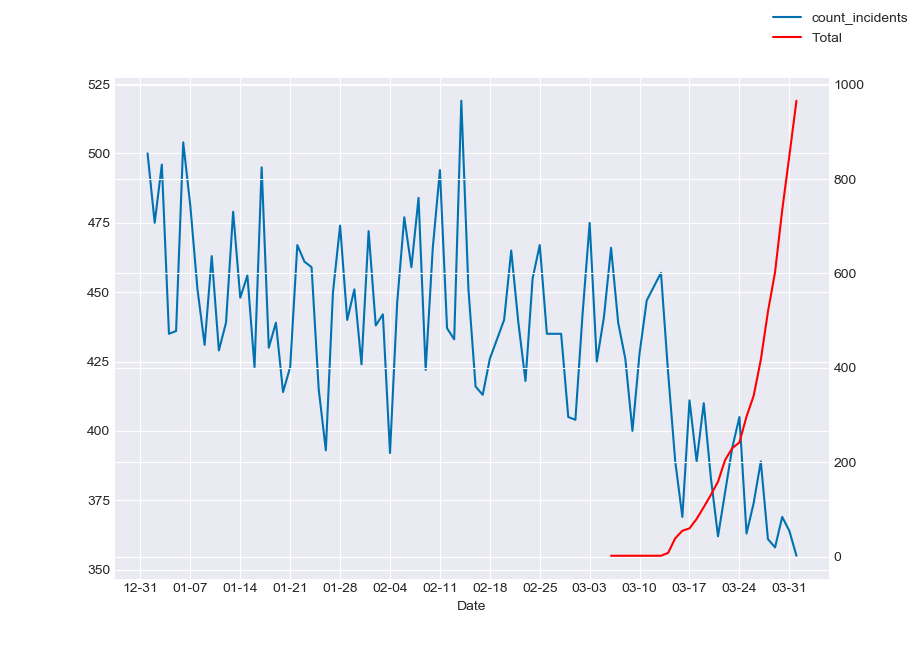

In [15]:
sns.set_style('darkgrid')
ax = count_incidents.plot(x='Date',y='count_incidents', legend=False)
ax2 = ax.twinx()
count_incidents.plot(x='Date',y='Total', legend=False, color='r', ax=ax2)
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax.figure.legend()
plt.show()

In [7]:
scattercount_incidents = count_incidents.loc[72:]
scattercount_incidents

,Date,count_incidents,Total
72,2020-03-13,457,2.0
73,2020-03-14,421,8.0
74,2020-03-15,389,39.0
75,2020-03-16,369,55.0
76,2020-03-17,411,60.0
77,2020-03-18,389,80.0
78,2020-03-19,410,105.0
79,2020-03-20,383,131.0
80,2020-03-21,362,159.0
81,2020-03-22,378,205.0


In [16]:
fig = px.scatter(scattercount_incidents, x="Total", y="count_incidents", trendline="ols")
fig.show()